In [1]:
import numpy as np
import argparse
import os, time


from pykin.utils import plot_utils as p_utils


from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=29, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-3dd75261-ec26-49b8-a5f3-67cdf8e453cd.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[ 0.55138973 -0.51071379  0.84779998]),
                           Object(name=bottle0, pos=[ 1.00620876 -0.42742182  0.83593753]),
                           Object(name=can0, pos=[ 0.54678044 -0.21343884  0.8351781 ]),
                           Object(name=milk0, pos=[0.53089438 0.53842909 0.83236691]),
                           Object(name=cerea

# Start Scene 

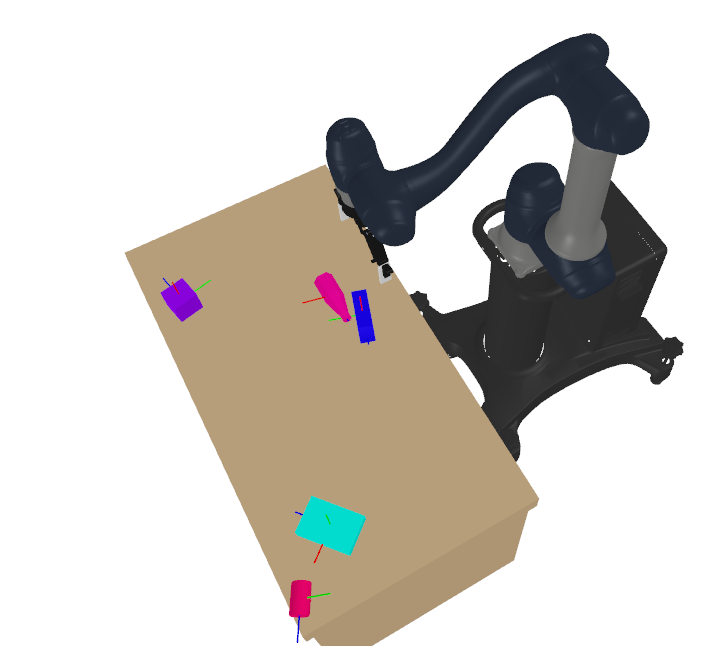

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.55138973 -0.51071379  0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 1.00620876 -0.42742182  0.83593753]), 'can0': Object(name=can0, pos=[ 0.54678044 -0.21343884  0.8351781 ]), 'milk0': Object(name=milk0, pos=[0.53089438 0.53842909 0.83236691]), 'cereal0': Object(name=cereal0, pos=[ 0.42371075 -0.42158034  0.82530427])}


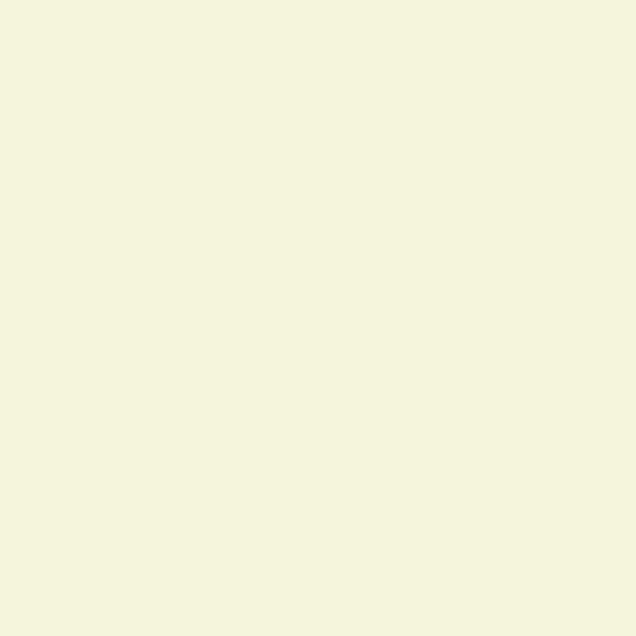

In [2]:
#######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# Goal Scene 

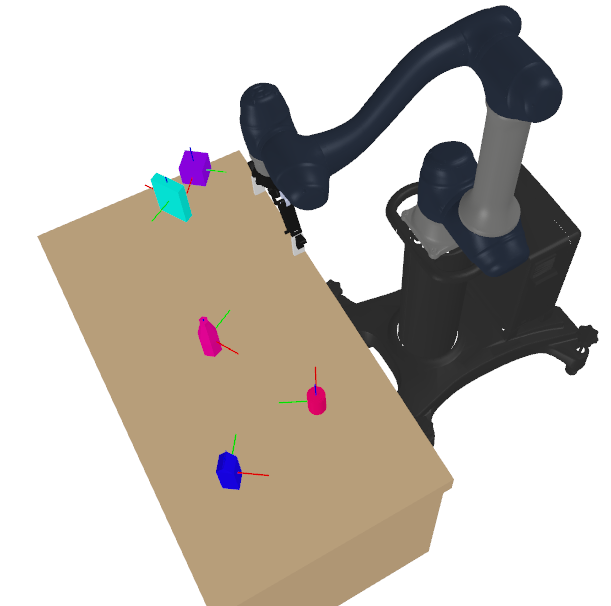

In [3]:
# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.86205615 0.01078561 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.98160651 0.01562353 0.87515735]), 'can0': Object(name=can0, pos=[0.99859944 0.25179191 0.85059666]), 'milk0': Object(name=milk0, pos=[0.41552276 0.15552074 0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.48967128 -0.0693121   0.88526188])}


In [11]:
c = 3
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [4]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 1 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(11) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(11) -> A(14) -> S'(20) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(20) -> A(26) -> S'(29) Reward : 2.5
[Action] Rearr can0
placed another place not goal
[Reward] S(29) -> A(34) -> S'(38) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(38) -> A(41) -> S'(47) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(47) -> A(52) -> S'(56) Reward : -3.333
[Action] Rearr bottle0
placed another place not goal
[Reward] S(56) -> A(59) -> S'(65) Reward : -1
[Action] Rearr ben_cube0
not bad Action
[Reward] S(65) -> A(67) -> S'(74) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(74) -> A(81) -> S'(83) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(83) -> A(86) -> 

[Action] Rearr can0
Bad Action
[Reward] S(416) -> A(421) -> S'(425) Reward : -6.667
[Action] Rearr cereal0
Good Action
[Reward] S(425) -> A(432) -> S'(433) Reward : 2.0
[Action] Rearr can0
placed another place not goal
[Reward] S(433) -> A(437) -> S'(441) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(441) -> A(448) -> S'(450) Reward : -3.333
[Action] Rearr can0
placed another place not goal
[Reward] S(450) -> A(455) -> S'(459) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(459) -> A(467) -> S'(468) Reward : 1.111
[Action] Rearr can0
placed another place not goal
[Reward] S(468) -> A(473) -> S'(477) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(477) -> A(479) -> S'(486) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  9.484246015548706 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 7 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(7) -> S'(4

[Action] Rearr bottle0
Bad Action
[Reward] S(826) -> A(827) -> S'(835) Reward : -3.333
[Action] Rearr milk0
placed another place not goal
[Reward] S(835) -> A(840) -> S'(844) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(844) -> A(851) -> S'(853) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(853) -> A(858) -> S'(861) Reward : 1.0
[Action] Rearr milk0
Good Action
[Reward] S(861) -> A(867) -> S'(870) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  16.935086727142334 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 12 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(10) -> S'(721) Reward : 5.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(721) -> A(722) -> S'(871) Reward : -1
[Action] Rearr cereal0
not bad Action
[Reward] S(871) -> A(879) -> S'(880) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(880) -> A(888) -> S'(889) Reward :

Good Action
[Reward] S(721) -> A(725) -> S'(1191) Reward : 3.333
[Action] Rearr cereal0
Bad Action
[Reward] S(1191) -> A(1198) -> S'(1200) Reward : -6.667
[Action] Rearr ben_cube0
Good Action
[Reward] S(1200) -> A(1202) -> S'(1209) Reward : 2.0
[Action] Rearr can0
placed another place not goal
[Reward] S(1209) -> A(1212) -> S'(1218) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(1218) -> A(1223) -> S'(1226) Reward : 1.429
[Action] Rearr ben_cube0
not bad Action
[Reward] S(1226) -> A(1227) -> S'(1234) Reward : -1
[Action] Rearr milk0
not bad Action
[Reward] S(1234) -> A(1240) -> S'(1243) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(1243) -> A(1251) -> S'(1252) Reward : 1.0
[Action] Rearr can0
placed another place not goal
[Reward] S(1252) -> A(1257) -> S'(1261) Reward : -1
Exceeded the maximum depth!!
########### Running time :  24.8643159866333 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 18 ===========
[Act

[Action] Rearr cereal0
Good Action
[Reward] S(1554) -> A(1562) -> S'(1563) Reward : 2.0
[Action] Rearr can0
Good Action
[Reward] S(1563) -> A(1568) -> S'(1571) Reward : 1.667
[Action] Rearr milk0
Good Action
[Reward] S(1571) -> A(1577) -> S'(1580) Reward : 1.429
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1580) -> A(1581) -> S'(1589) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(1589) -> A(1590) -> S'(1597) Reward : -2.5
[Action] Rearr can0
not bad Action
[Reward] S(1597) -> A(1601) -> S'(1606) Reward : -1
[Action] Rearr cereal0
not bad Action
[Reward] S(1606) -> A(1614) -> S'(1615) Reward : -1
Exceeded the maximum depth!!
########### Running time :  31.700717449188232 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 23 ===========
[Action] Rearr milk0
Good Action
[Reward] S(0) -> A(8) -> S'(566) Reward : 5.0
[Action] Rearr bottle0
Good Action
[Reward] S(566) -> A(570) -> S'(1616) Reward : 3.333
[Acti

[Action] Rearr cereal0
Good Action
[Reward] S(1914) -> A(1921) -> S'(1922) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  37.79253840446472 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 28 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(5) -> S'(325) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(325) -> A(326) -> S'(1923) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1923) -> A(1930) -> S'(1932) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(1932) -> A(1938) -> S'(1941) Reward : 2.0
[Action] Rearr milk0
Good Action
[Reward] S(1941) -> A(1947) -> S'(1950) Reward : 1.667
[Action] Rearr can0
not bad Action
[Reward] S(1950) -> A(1956) -> S'(1959) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1959) -> A(1960) -> S'(1968) Reward : -1
[Action] Rearr cereal0
placed another place no

[Action] Rearr cereal0
not bad Action
[Reward] S(2260) -> A(2268) -> S'(2269) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(2269) -> A(2275) -> S'(2278) Reward : 1.667
[Action] Rearr milk0
Good Action
[Reward] S(2278) -> A(2284) -> S'(2287) Reward : 1.429
##########['cereal0', 'ben_cube0', 'bottle0', 'can0', 'milk0']#############
Success!!!!!
Terminal State! Reward is 5
########### Running time :  45.27054214477539 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 34 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(9) -> S'(644) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(644) -> A(647) -> S'(2288) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(2288) -> A(2296) -> S'(2297) Reward : 2.5
[Action] Rearr ben_cube0
Good Action
[Reward] S(2297) -> A(2299) -> S'(2306) Reward : 2.0
[Action] Rearr milk0
Good Action
[Reward] S(2306) -> A(2312) -> S'(2315) Rew

Good Action
[Reward] S(644) -> A(652) -> S'(2621) Reward : 3.333
[Action] Rearr can0
placed another place not goal
[Reward] S(2621) -> A(2626) -> S'(2630) Reward : -1
[Action] Rearr milk0
not bad Action
[Reward] S(2630) -> A(2635) -> S'(2638) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(2638) -> A(2642) -> S'(2647) Reward : 1.667
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2647) -> A(2648) -> S'(2656) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(2656) -> A(2661) -> S'(2665) Reward : -2.857
[Action] Rearr can0
placed another place not goal
[Reward] S(2665) -> A(2669) -> S'(2673) Reward : -1
[Action] Rearr bottle0
not bad Action
[Reward] S(2673) -> A(2677) -> S'(2681) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2681) -> A(2682) -> S'(2690) Reward : -1
Exceeded the maximum depth!!
########### Running time :  53.30552411079407 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Sea

Good Action
[Reward] S(2288) -> A(2290) -> S'(2953) Reward : 2.5
[Action] Rearr can0
placed another place not goal
[Reward] S(2953) -> A(2956) -> S'(2962) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(2962) -> A(2970) -> S'(2971) Reward : 1.667
[Action] Rearr ben_cube0
Bad Action
[Reward] S(2971) -> A(2972) -> S'(2980) Reward : -3.333
[Action] Rearr can0
Good Action
[Reward] S(2980) -> A(2984) -> S'(2989) Reward : 1.25
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2989) -> A(2990) -> S'(2998) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(2998) -> A(3001) -> S'(3007) Reward : -2.222
[Action] Rearr milk0
Good Action
[Reward] S(3007) -> A(3013) -> S'(3016) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  60.00810265541077 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 45 ===========
[Action] Rearr bottle0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(169) Rewar

[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(3310) -> A(3311) -> S'(3319) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(3319) -> A(3321) -> S'(3328) Reward : 1.429
[Action] Rearr can0
placed another place not goal
[Reward] S(3328) -> A(3331) -> S'(3337) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(3337) -> A(3343) -> S'(3346) Reward : 1.111
[Action] Rearr bottle0
not bad Action
[Reward] S(3346) -> A(3350) -> S'(3355) Reward : -1
[Action] Rearr cereal0
not bad Action
[Reward] S(3355) -> A(3362) -> S'(3363) Reward : -1
Exceeded the maximum depth!!
########### Running time :  66.1194155216217 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 50 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(5) -> S'(325) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(325) -> A(327) -> S'(3364) Reward : 3.333
[Action] Rearr bottle0
Good Action
[Reward] S(3364) -> A(

[Action] Rearr cereal0
Bad Action
[Reward] S(3677) -> A(3684) -> S'(3686) Reward : -3.333
[Action] Rearr ben_cube0
Good Action
[Reward] S(3686) -> A(3688) -> S'(3695) Reward : 1.25
[Action] Rearr can0
placed another place not goal
[Reward] S(3695) -> A(3698) -> S'(3704) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(3704) -> A(3711) -> S'(3713) Reward : -1
[Action] Rearr ben_cube0
not bad Action
[Reward] S(3713) -> A(3715) -> S'(3722) Reward : -1
Exceeded the maximum depth!!
########### Running time :  73.39815020561218 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 55 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(5) -> S'(325) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(325) -> A(331) -> S'(3723) Reward : 3.333
[Action] Rearr can0
placed another place not goal
[Reward] S(3723) -> A(3728) -> S'(3732) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(37

placed another place not goal
[Reward] S(4018) -> A(4019) -> S'(4027) Reward : -1
[Action] Rearr cereal0
not bad Action
[Reward] S(4027) -> A(4035) -> S'(4036) Reward : -1
[Action] Rearr bottle0
not bad Action
[Reward] S(4036) -> A(4039) -> S'(4044) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(4044) -> A(4051) -> S'(4053) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  81.98211932182312 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 60 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(9) -> S'(644) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(644) -> A(647) -> S'(2288) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(2288) -> A(2292) -> S'(4054) Reward : 2.5
[Action] Rearr bottle0
placed another place not goal
[Reward] S(4054) -> A(4057) -> S'(4063) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(4063) -> A(4068) -> S'(

[Action] Rearr can0
Good Action
[Reward] S(4341) -> A(4345) -> S'(4350) Reward : 1.111
[Action] Rearr milk0
not bad Action
[Reward] S(4350) -> A(4356) -> S'(4359) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(4359) -> A(4362) -> S'(4368) Reward : -1
Exceeded the maximum depth!!
########### Running time :  88.02521586418152 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 65 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(5) -> S'(325) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(325) -> A(332) -> S'(4369) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(4369) -> A(4374) -> S'(4378) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(4378) -> A(4382) -> S'(4387) Reward : 2.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(4387) -> A(4392) -> S'(4396) Reward : -1
[Action] Rearr bottle0
not bad Action

[Action] Rearr can0
Bad Action
[Reward] S(4674) -> A(4679) -> S'(4683) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  95.0186231136322 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 70 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(92) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(92) -> A(94) -> S'(981) Reward : 3.333
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(981) -> A(982) -> S'(4684) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(4684) -> A(4692) -> S'(4693) Reward : 2.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(4693) -> A(4694) -> S'(4702) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(4702) -> A(4706) -> S'(4711) Reward : 1.429
[Action] Rearr bottle0
Bad Action
[Reward] S(4711) -> A(4714) -> S'(4719) Reward : -2.857
[Action] Rearr cereal0
not bad Action
[Reward] S(4719) -> A(472

[Action] Rearr can0
Good Action
[Reward] S(5005) -> A(5009) -> S'(5014) Reward : 2.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(5014) -> A(5019) -> S'(5023) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(5023) -> A(5026) -> S'(5032) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(5032) -> A(5038) -> S'(5040) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(5040) -> A(5043) -> S'(5047) Reward : -2.5
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(5047) -> A(5048) -> S'(5056) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(5056) -> A(5059) -> S'(5064) Reward : -1
Exceeded the maximum depth!!
########### Running time :  103.24882388114929 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 76 ===========
[Action] Rearr milk0
Good Action
[Reward] S(0) -> A(8) -> S'(566) Reward : 5.0
[Action] Rearr bottle0
placed anothe

[Action] Rearr milk0
not bad Action
[Reward] S(5314) -> A(5319) -> S'(5322) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(5322) -> A(5329) -> S'(5331) Reward : -1
[Action] Rearr milk0
not bad Action
[Reward] S(5331) -> A(5339) -> S'(5340) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(5340) -> A(5348) -> S'(5349) Reward : 1.0
[Action] Rearr bottle0
Bad Action
[Reward] S(5349) -> A(5352) -> S'(5358) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  108.60865640640259 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 81 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(92) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(92) -> A(99) -> S'(3294) Reward : 3.333
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(3294) -> A(3295) -> S'(5359) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(5359) -> A(536

[Action] Rearr ben_cube0
not bad Action
[Reward] S(5645) -> A(5647) -> S'(5654) Reward : -1
Exceeded the maximum depth!!
########### Running time :  114.9895544052124 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 86 ===========
[Action] Rearr bottle0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(169) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(169) -> A(173) -> S'(3222) Reward : 3.333
[Action] Rearr milk0
placed another place not goal
[Reward] S(3222) -> A(3227) -> S'(5655) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(5655) -> A(5660) -> S'(5664) Reward : -5.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(5664) -> A(5666) -> S'(5673) Reward : 1.667
[Action] Rearr cereal0
placed another place not goal
[Reward] S(5673) -> A(5680) -> S'(5682) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(5682) -> A(5687) -> S'(5691) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(

placed another place not goal
[Reward] S(1923) -> A(1924) -> S'(5967) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(5967) -> A(5968) -> S'(5976) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(5976) -> A(5977) -> S'(5983) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(5983) -> A(5984) -> S'(5991) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(5991) -> A(5993) -> S'(6000) Reward : 1.25
[Action] Rearr cereal0
Good Action
[Reward] S(6000) -> A(6008) -> S'(6009) Reward : 1.111
[Action] Rearr bottle0
not bad Action
[Reward] S(6009) -> A(6013) -> S'(6018) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(6018) -> A(6022) -> S'(6027) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  121.63632917404175 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 92 ===========
[Action] Rearr cereal0
placed another place not go

placed another place not goal
[Reward] S(6275) -> A(6280) -> S'(6284) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(6284) -> A(6285) -> S'(6293) Reward : -1
[Action] Rearr milk0
not bad Action
[Reward] S(6293) -> A(6299) -> S'(6302) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(6302) -> A(6306) -> S'(6310) Reward : 1.25
[Action] Rearr can0
placed another place not goal
[Reward] S(6310) -> A(6313) -> S'(6319) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(6319) -> A(6324) -> S'(6328) Reward : -2.222
[Action] Rearr cereal0
placed another place not goal
[Reward] S(6328) -> A(6335) -> S'(6337) Reward : -1
Exceeded the maximum depth!!
########### Running time :  127.47981476783752 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 29
=========== Search iteration : 97 ===========
[Action] Rearr bottle0
Good Action
[Reward] S(0) -> A(4) -> S'(247) Reward : 5.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2

In [7]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value

19.0

In [8]:
mcts.history_level_1_dict

{0: {'nodes': [0,
   10,
   721,
   722,
   871,
   879,
   880,
   888,
   889,
   890,
   898,
   900,
   907,
   909,
   916,
   920,
   925],
  'value': 11.989682539682542},
 1: {'nodes': [0,
   10,
   721,
   723,
   926,
   927,
   935,
   943,
   944,
   950,
   953,
   959,
   962,
   964,
   971,
   973,
   980],
  'value': 13.739682539682539},
 2: {'nodes': [0, 10, 721, 729, 1827, 1833, 1836, 1840, 1845, 1846, 1853],
  'value': 19.0},
 3: {'nodes': [0,
   10,
   721,
   723,
   926,
   928,
   2260,
   2268,
   2269,
   2275,
   2278,
   2284,
   2287],
  'value': 17.32857142857143},
 4: {'nodes': [0,
   9,
   644,
   647,
   2288,
   2296,
   2297,
   2299,
   2306,
   2312,
   2315,
   2319,
   2324,
   2330,
   2333,
   2339,
   2342],
  'value': 9.906349206349207},
 5: {'nodes': [0,
   8,
   566,
   569,
   1407,
   1408,
   5065,
   5069,
   5074,
   5079,
   5082,
   5090,
   5091,
   5095,
   5100,
   5106,
   5108,
   5110,
   5117],
  'value': 9.889682539682541},
 6:

In [10]:
########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j}: ", max_value_nodes)
    mcts.render_rearr("_", max_value_nodes)

Result 2:  [0, 10, 721, 729, 1827, 1833, 1836, 1840, 1845, 1846, 1853]


In [7]:
idx = 0
val_ = -np.inf
for k,v in mcts.history_level_1_dict.items():
    if val_ < v['value']:
        idx = k
        val_ = v['value']
        
max_value_nodes = mcts.history_level_1_dict[2]['nodes']
mcts.render_rearr("_", max_value_nodes)
# idx, max_value_nodes

In [37]:
mcts.history_level_1_dict

{0: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   282,
   285,
   288,
   291,
   293,
   298,
   301,
   305,
   307,
   312],
  'value': 12.489682539682542},
 1: {'nodes': [0,
   5,
   264,
   266,
   493,
   498,
   500,
   502,
   508,
   510,
   514,
   518,
   521,
   525,
   528,
   530,
   535],
  'value': 11.989682539682542},
 2: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   282,
   285,
   288,
   291,
   293,
   298,
   300,
   1983,
   2396,
   2400,
   2404,
   2408,
   2410,
   2415],
  'value': 10.587662337662339},
 3: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   282,
   285,
   288,
   291,
   293,
   298,
   301,
   305,
   307,
   311,
   2135,
   2631],
  'value': 11.27857142857143},
 4: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   282,
   285,
   288,
   291,
   293,
   298,
   301,
   305,
   307,
   311,
   2135,
   2630,
   2805,
   2812],
  'value': 10.087662337662337}}

In [48]:
mcts.tree.nodes[0]['state'],mcts.tree.nodes[264]['state']

(<pytamp.scene.scene.Scene at 0x7f74f51aad30>,
 <pytamp.scene.scene.Scene at 0x7f7437ff0ca0>)

In [16]:
mcts.rearr_action.info.REARR_OBJ_NAME

'rearr_obj_name'

=========== Search iteration : 1 ===========
[Action] Rearr can0
Good Action
[Reward] S(0) -> A(6) -> S'(11) Reward : 5.0
[Action] Rearr milk0
Good Action
[Reward] S(11) -> A(17) -> S'(20) Reward : 3.333
[Action] Rearr bottle0
placed another place not goal
[Reward] S(20) -> A(23) -> S'(29) Reward : -1
[Action] Rearr can0
not bad Action
[Reward] S(29) -> A(33) -> S'(38) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(38) -> A(46) -> S'(47) Reward : 1.667
[Action] Rearr bottle0
Good Action
[Reward] S(47) -> A(51) -> S'(56) Reward : 1.429
[Action] Rearr cereal0
Bad Action
[Reward] S(56) -> A(63) -> S'(65) Reward : -2.857
[Action] Rearr ben_cube0
Good Action
[Reward] S(65) -> A(67) -> S'(74) Reward : 1.111
[Action] Rearr can0
Bad Action
[Reward] S(74) -> A(77) -> S'(83) Reward : -2.222
[Action] Rearr milk0
not bad Action
[Reward] S(83) -> A(89) -> S'(92) Reward : -1
Exceeded the maximum depth!!


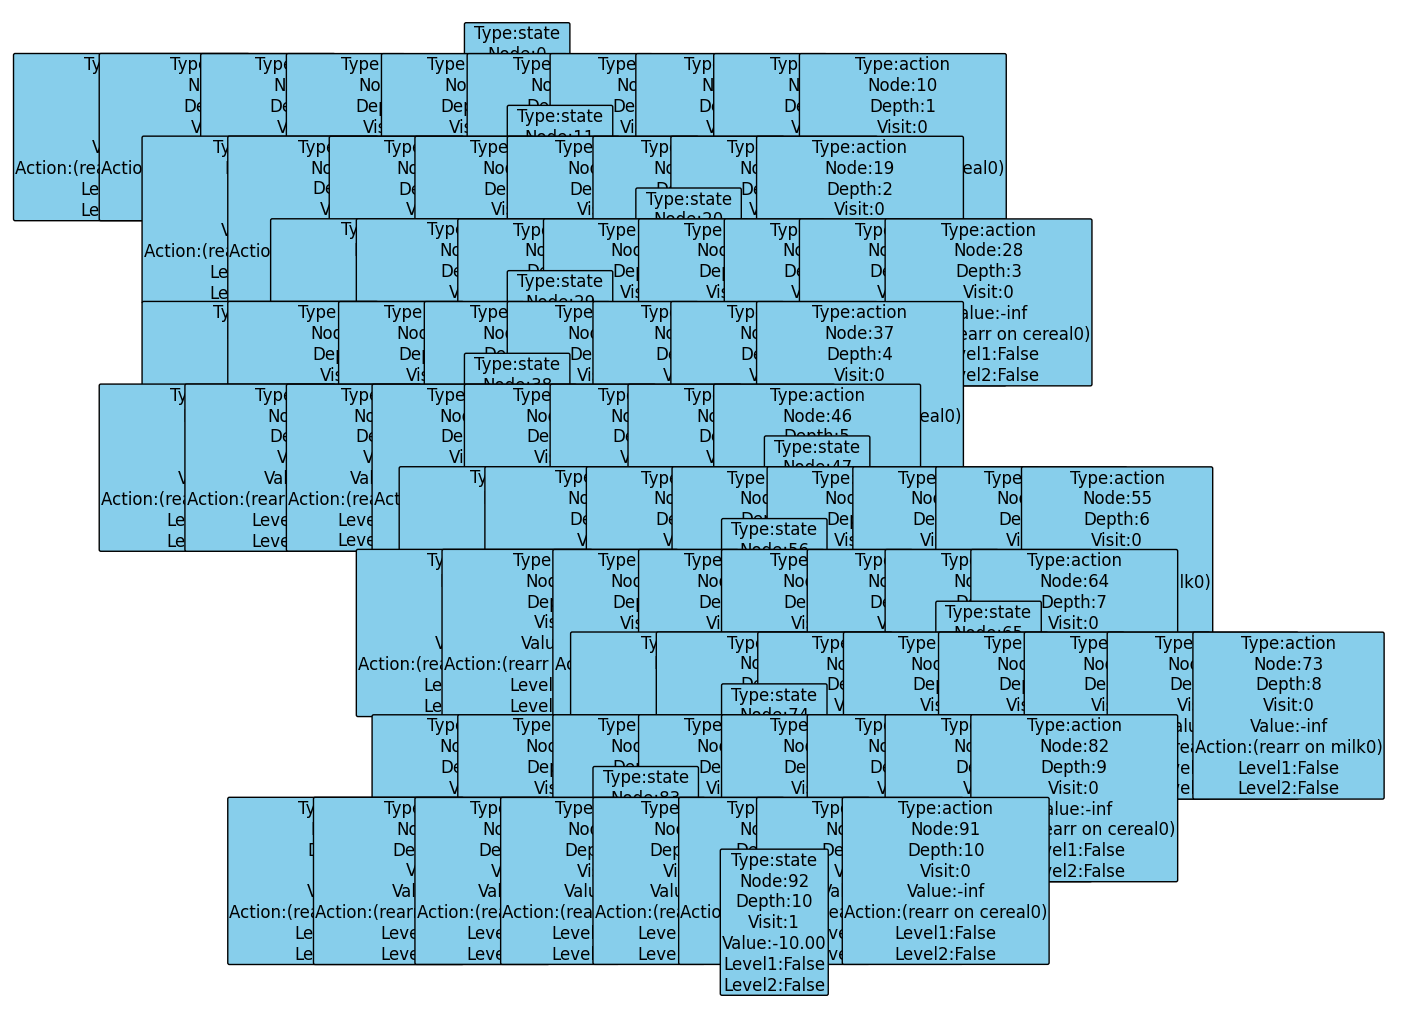

In [12]:
mcts.do_planning_rearrange(0)

mcts.visualize_tree("Siccess nodes", mcts.tree)

# Scene collision info 

In [ ]:
col_info = {}

def get_h_mat(position=np.zeros(3), orientation=np.array([1.0, 0.0, 0.0, 0.0])):
    """
    Returns homogeneous matrix from position and orientation
    """
    position = np.asarray(position)
    orientation = np.asarray(orientation)
    if orientation.shape == (3,):  # RPY Euler angles
        R = get_matrix_from_rpy(orientation)
    elif orientation.shape == (4,):  # quaternion in the form [x,y,z,w]
        R = get_matrix_from_quaternion(orientation)
    elif orientation.shape == (3, 3):  # Rotation matrix
        R = orientation

    H = np.vstack((np.hstack((R, position.reshape(-1, 1))), np.array([[0, 0, 0, 1]])))
    return H

for name, info in mcts.init_scene.collision_manager._objs.items():
    T = get_h_mat(
        position=info["obj"].getTranslation(),
        orientation=info["obj"].getRotation(),
    )
    col_info[name] = T

# Collision check

In [13]:
max_value_nodes

[0,
 4,
 179,
 184,
 1126,
 1131,
 1134,
 1139,
 1141,
 1144,
 1147,
 4142,
 4143,
 4148,
 4151,
 4153,
 4158,
 4159,
 4165]

In [14]:
idx = 4148
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'milk0': array([[ 0.96655143, -0.25647288,  0.        ,  0.88596138],
       [ 0.25647288,  0.96655143,  0.        , -0.40701088],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'milk0': array([[ 0.49220865,  0.87047725,  0.        ,  0.81366052],
       [-0.87047725,  0.49220865,  0.        ,  0.0371563 ],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [15]:
idx = 4153
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'bottle0': array([[-0.14103772,  0.99000422,  0.        ,  0.82751786],
       [-0.99000422, -0.14103772,  0.        , -0.4207895 ],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'bottle0': array([[-0.05088925, -0.9987043 ,  0.        ,  0.62542366],
       [ 0.9987043 , -0.05088925,  0.        , -0.24336767],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [23]:
mcts.render_rearr_state( None,title =  '_', state = mcts.tree.nodes[idx]['state'])

In [25]:
mcts.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.7449755  0.50675499 0.84779998]),
 'bottle0': Object(name=bottle0, pos=[ 0.74971138 -0.29269512  0.83593753]),
 'can0': Object(name=can0, pos=[0.58752796 0.31872161 0.83500836]),
 'milk0': Object(name=milk0, pos=[ 0.47826872 -0.11880885  0.83236691])}

In [24]:
idx, list(mcts.rearr_action.get_goal_location_not_collision(mcts.tree.nodes[idx]['state'],mcts.tree.nodes[idx]['action']['rearr_poses']))

(862,
 [{'can0': array([[ 0.71035039, -0.70384822,  0.        ,  0.7415683 ],
          [ 0.70384822,  0.71035039,  0.        , -0.55474858],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])},
  {'can0': array([[-0.17171101,  0.98514736,  0.        ,  0.83996994],
          [-0.98514736, -0.17171101,  0.        , -0.27054348],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])}])

In [47]:
mcts.scene_mngr.obj_collision_mngr.get_collision_info()

{'table': array([[ 1.   ,  0.   ,  0.   ,  1.   ],
        [ 0.   ,  1.   ,  0.   , -0.6  ],
        [ 0.   ,  0.   ,  1.   ,  0.043],
        [ 0.   ,  0.   ,  0.   ,  1.   ]]),
 'ben_cube0': array([[ 0.        ,  0.78165694, -0.62370861,  0.84763533],
        [ 0.        ,  0.62370861,  0.78165694,  0.36753831],
        [ 1.        ,  0.        ,  0.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[-0.65291822,  0.75742841,  0.        ,  0.83010826],
        [-0.75742841, -0.65291822,  0.        , -0.20864996],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'ben_cube1': array([[-0.17287648,  0.98494351,  0.        ,  0.49591774],
        [ 0.98494351,  0.17287648,  0.        ,  0.45601634],
        [ 0.        ,  0.        , -1.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[-0.81254636,  

In [18]:
for name, obj in mcts.rearr_action.scene_mngr.scene.objs.items():
    print(name, obj.h_mat)

table [[ 1.     0.     0.     1.   ]
 [ 0.     1.     0.    -0.6  ]
 [ 0.     0.     1.     0.043]
 [ 0.     0.     0.     1.   ]]
ben_cube0 [[-0.34614189 -0.93818217  0.          0.46298891]
 [ 0.93818217 -0.34614189  0.          0.02937996]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle0 [[-0.65291822  0.75742841  0.          0.83010826]
 [-0.75742841 -0.65291822  0.         -0.20864996]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
ben_cube1 [[-0.19514173  0.98077505  0.          0.96563102]
 [-0.98077505 -0.19514173  0.          0.29412445]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle1 [[-0.81254636  0.58289657  0.          0.38289801]
 [-0.58289657 -0.81254636  0.          0.37264649]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]


In [26]:
from copy import deepcopy
a = 2
b = deepcopy(a)
a==b

True